In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels
import math
from sklearn.impute import SimpleImputer


#data = pd.read_csv("submetering.csv",delimiter=',')
#print(data["Date"])
#data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S")

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('submetering.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
print(data)
df.index = pd.date_range(start=pd.datetime(2007,1,1),freq='M',periods=len(data))
df.head()

#data.set_index("Date",inplace=True)
#print(data["Date"])
print(data.index)

                     Global_active_power  Global_reactive_power  Voltage  \
Date                                                                       
2006-12-16 17:00:00                4.587                  0.484  234.367   
2006-12-16 17:30:00                4.150                  0.178  234.699   
2006-12-16 18:00:00                3.945                  0.085  235.185   
2006-12-16 18:30:00                3.320                  0.075  233.976   
2006-12-16 19:00:00                3.464                  0.050  233.754   
2006-12-16 19:30:00                3.336                  0.121  232.711   
2006-12-16 20:00:00                3.299                  0.054  233.225   
2006-12-16 20:30:00                3.239                  0.096  234.918   
2006-12-16 21:00:00                3.032                  0.063  237.352   
2006-12-16 21:30:00                3.081                  0.090  236.966   
2006-12-16 22:00:00                2.516                  0.037  237.728   
2006-12-16 2

AttributeError: 'datetime.datetime' object has no attribute 'value'

In [76]:
#plt.plot()
#print(data['Global_active_power'])
#df = pd.DataFrame({'Date':data['Date'],'Global_active_power':data['Global_active_power']})


#imp = SimpleImputer(missing_values=-1, strategy='mean')
#imp.fit(df)                  
#SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=-1, strategy='mean', verbose=0)
#imp.transform(df)
#data = data['2007']
data = data.dropna()

#print(data.values)
ts = pd.Series(data['Global_active_power'],data.index)
#ts=data['Global_active_power']
print(len(ts))
ts.head()
#print(ts)
#print(df)
data.index

68324


DatetimeIndex(['2006-12-16 17:00:00', '2006-12-16 17:30:00',
               '2006-12-16 18:00:00', '2006-12-16 18:30:00',
               '2006-12-16 19:00:00', '2006-12-16 19:30:00',
               '2006-12-16 20:00:00', '2006-12-16 20:30:00',
               '2006-12-16 21:00:00', '2006-12-16 21:30:00',
               ...
               '2010-11-26 16:30:00', '2010-11-26 17:00:00',
               '2010-11-26 17:30:00', '2010-11-26 18:00:00',
               '2010-11-26 18:30:00', '2010-11-26 19:00:00',
               '2010-11-26 19:30:00', '2010-11-26 20:00:00',
               '2010-11-26 20:30:00', '2010-11-26 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=68324, freq=None)

In [60]:

train=ts[0:300] 
test=ts[300:]
#print(ts)
#print(train)

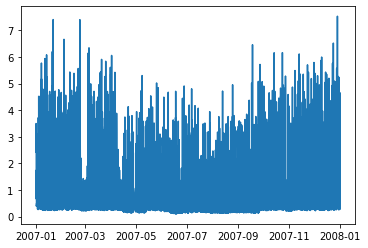

In [61]:
plt.plot(ts)

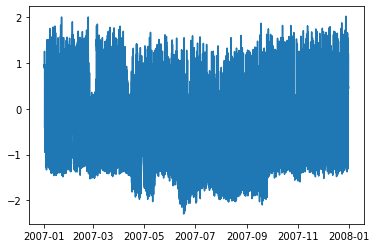

In [62]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [63]:
#ts_year = ts.resample('d').mean()
#plt.plot(ts_year)

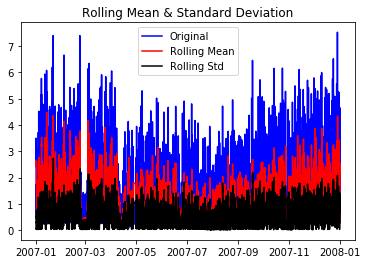

Results of Dickey-Fuller Test:
Test Statistic                -1.046667e+01
p-value                        1.316249e-18
#Lags Used                     4.400000e+01
Number of Observations Used    1.734800e+04
Critical Value (1%)           -3.430727e+00
Critical Value (5%)           -2.861707e+00
Critical Value (10%)          -2.566859e+00
dtype: float64


In [64]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                        'p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

ts1 = ts
test_stationarity(ts1)

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Global_active_power'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [ ]:
val = train[len(train)-1]
y_hat = pd.Series(np.full(shape=len(test),fill_value=val),test.index) 

plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index, y_hat, label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rms = math.sqrt(mean_squared_error(test, y_hat))
print(rms)

In [ ]:
# Moving average
val = train.rolling(12).mean().iloc[-1]
y_hat_avg = pd.Series(np.full(shape=len(test),fill_value=val),test.index) 

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
print(np.where(np.isnan(test)))

rms = math.sqrt(mean_squared_error(test, y_hat_avg))
print(rms)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#error? change 'scipy.misc import logsumexp' to 'from scipy.special import logsumexp'

fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
series = fit2.forecast(len(test))
y_hat_ses = pd.Series(series, test.index)

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ses, label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = math.sqrt(mean_squared_error(test, y_hat_ses))
print(rms)

In [ ]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()